In [1]:
# https://docs.wradlib.org/en/stable/installation.html 
# ENABLE ENVIRONMENT FIRST!
# Environment Access via Anaconda Navigator
import wradlib as wrl
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

C:\Users\Tim\Anaconda3\envs\wradlib\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
import os
# Path to DATA location (Change to match Crwaler )
os.environ["WRADLIB_DATA"] = r"C:\Users\Tim\Documents\HTWG\WS1819\Teamprojekt\DWD-Daten"

In [3]:
# Read in File 
rw_filename = wrl.util.get_wradlib_data_file('raa01-rw_10000-1801010050-dwd---bin.gz')

# At the moment, the national RADOLAN composite is a 900 x 900 grid with 1 km resolution 
# and in polar-stereographic projection. 

#data : numpy.array of shape (number of rows, number of columns)
#attrs : dictionary of metadata information from the file header
rwdata, rwattrs = wrl.io.read_radolan_composite(rw_filename)
# print the available attributes
print("RW Attributes:", rwattrs)

RW Attributes: {'producttype': 'RW', 'datetime': datetime.datetime(2018, 1, 1, 0, 50), 'radarid': '10000', 'datasize': 1620000, 'maxrange': '150 km', 'radolanversion': '2.16.0', 'precision': 0.1, 'intervalseconds': 3600, 'nrow': 900, 'ncol': 900, 'radarlocations': ['boo', 'ros', 'emd', 'hnr', 'umd', 'pro', 'ess', 'fld', 'drs', 'neu', 'nhb', 'oft', 'eis', 'tur', 'isn', 'fbg', 'mem'], 'moduleflag': 1, 'nodataflag': -9999, 'secondary': array([   188,    189,    190, ..., 637363, 637364, 638260], dtype=int64), 'cluttermask': array([], dtype=int64)}


#### Grid 
See [RADOLAN GRID](https://docs.wradlib.org/en/stable/notebooks/radolan/radolan_grid.html)

Recommended Source: 
RX/WX: original radardata in qualitative RVP6-units (1 byte coded)  <- USED <br>
RZ: radardata after correction of PBB converted to rainrate with improved Z-R-relation <br>
RY: radardata after correction with Quality-comp osit (QY) <br>

[RADOLAN-Produktübersicht](https://www.dwd.de/DE/leistungen/radolan/produktuebersicht/radolan_produktuebersicht_pdf.pdf?__blob=publicationFile&v=6)



In [4]:
# Grid Germany
# National Composites (R-, S- and W-series) <- USED
radolan_grid_xy = wrl.georef.get_radolan_grid(900,900)
#Extended Grid
# As used in  European Composites
radolan_egrid_xy = wrl.georef.get_radolan_grid(1500,1400)
# Grid Germany+d
# See 
radolan_wgrid_xy = wrl.georef.get_radolan_grid(1100, 900)

x = radolan_grid_xy[:,:,0]
y = radolan_grid_xy[:,:,1]

xe = radolan_egrid_xy[:,:,0]
ye = radolan_egrid_xy[:,:,1]

xw = radolan_wgrid_xy[:,:,0]
yw = radolan_wgrid_xy[:,:,1]

In [5]:
def read_radolan(radfile):
    radfile = wrl.util.get_wradlib_data_file('' + radfile)
    return wrl.io.read_radolan_composite(radfile)

In [6]:
def plot_radolan(data, attrs, grid, clabel=None):
    fig = pl.figure(figsize=(10,8))
    ax = fig.add_subplot(111, aspect='equal')
    x = grid[:,:,0]
    y = grid[:,:,1]
    pm = ax.pcolormesh(x, y, data, cmap='viridis')
    cb = fig.colorbar(pm, shrink=0.75)
    cb.set_label(clabel)
    pl.xlabel("x [km]")
    pl.ylabel("y [km]")
    pl.title('{0} Product\n{1}'.format(attrs['producttype'],
                                       attrs['datetime'].isoformat()))
    pl.xlim((x[0,0],x[-1,-1]))
    pl.ylim((y[0,0],y[-1,-1]))
    pl.grid(color='r')

In [41]:
def plot_radolan_png(data, attrs, grid, clabel=None, pathToSave='Unnamed'):
    fig = pl.figure(figsize=(10,8))
    ax = fig.add_subplot(111, aspect='equal')
    x = grid[:,:,0]
    y = grid[:,:,1]
    
    data = data[200:800,200:850]
    x = x[200:800,200:850]
    y = y[200:800,200:850]

    pm = ax.pcolormesh(x, y, data, cmap='viridis')
    pl.axis('off')
    pl.xlim((x[0,0],x[-1,-1]))
    pl.ylim((y[0,0],y[-1,-1]))
    pl.savefig(os.environ["WRADLIB_DATA"] + '\\' + pathToSave + '.png', bbox_inches='tight')

In [50]:
#Mask an array where equal to a given value.
data = np.ma.masked_equal(data, -9999)

In [12]:
# Bild als GIF speichern 
# Maximum aus allen Daten rausfiltern
# Daten ansehen um geeigneten Maßstab zu finden
# Quantisierung
# Breitengrad von Konstanz: 47.6779496
# Längengrad von Konstanz: 9.1732384

In [13]:
def findMinMaxValues(data, minValues, maxValues):
    minValues.append(np.min(data))
    maxValues.append(np.max(data))
    

0.0
7.75


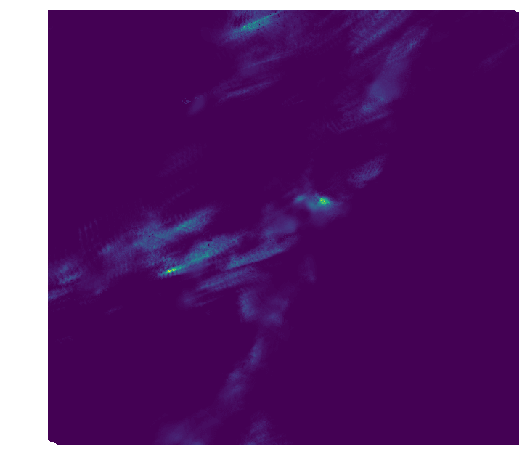

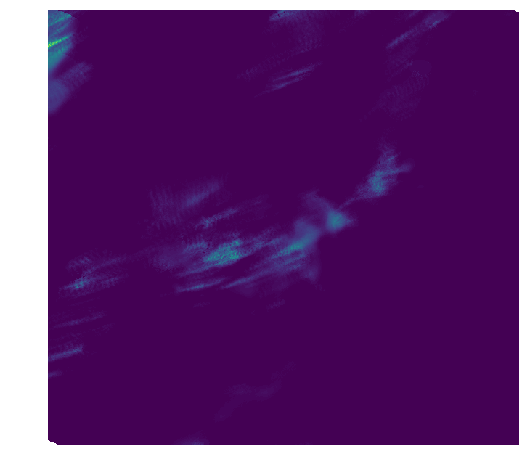

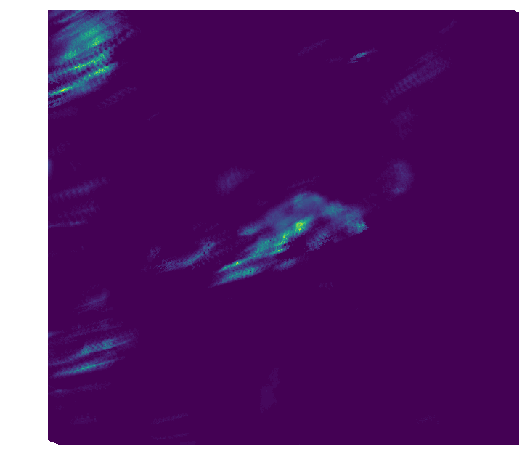

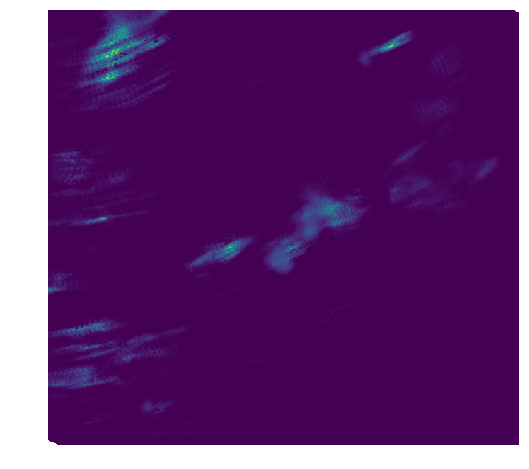

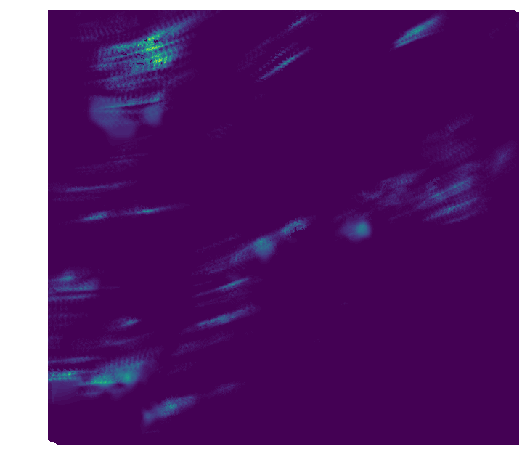

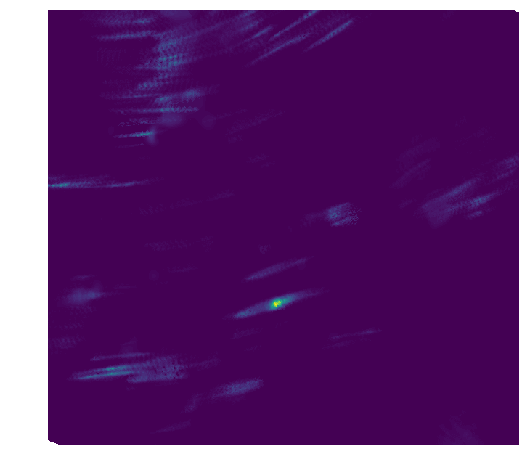

In [49]:
minValues = []
maxValues = []


for subdir, dirs, files in os.walk(os.environ["WRADLIB_DATA"]):
    for file in files:
        if '.png' in file:
            continue
        data, attrs = read_radolan(file)
        data = np.ma.masked_equal(data, -9999)      
        findMinMaxValues(data, minValues, maxValues)
        plot_radolan_png(data, attrs, radolan_grid_xy, clabel='mm * h-1', pathToSave = file);
    
print(np.mean(minValues))
print(np.mean(maxValues))

